In [2]:
%reset -f

import pandas as pd
import numpy as np
# import folium   
import os
# import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 16})
from matplotlib.transforms import ScaledTranslation
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.ticker import AutoLocator
import seaborn as sns

import nrarfcn as nr
# https://gitlab.com/alexander_marder/earfcn
# https://pypi.org/project/earfcn/0.0.3/
from earfcn.convert import earfcn2freq

In [3]:
df_app_capacity = pd.read_csv('../_data/Spring2025_ArkansasNH/app_capacity.csv')
df_app_capacity = df_app_capacity[df_app_capacity['Test Status'] == 'Completed']
df_app_capacity['Calculated Tput (Mbps)'] = (df_app_capacity['Bytes Transferred']*8) / (df_app_capacity['Duration']*1e6)


df_app_dl = df_app_capacity[df_app_capacity['Direction'] == 'Downlink']
df_app_ul = df_app_capacity[df_app_capacity['Direction'] == 'Uplink']


df_app_dl['Collection_1'] = np.nan
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day1-WIFI-IN']), 'WIFI-IN', df_app_dl['Collection_1'])
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day1-WIFI-OUT']), 'WIFI-OUT', df_app_dl['Collection_1'])

df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day1-ATT-NH-IN']), 'ATT-NH-IN', df_app_dl['Collection_1'])
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day1-TMO-NH-IN']), 'TMO-NH-IN', df_app_dl['Collection_1'])
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day1-ATT-NH-OUT']), 'ATT-NH-OUT', df_app_dl['Collection_1'])
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day1-TMO-NH-OUT']), 'TMO-NH-OUT', df_app_dl['Collection_1'])

df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day2-ATT-MNO-DEF-OUT', 'Day2-ATT-MNO-4G-OUT', 'Day1-ATT-MNO-DEF-OUT']), 'ATT-MNO-OUT', df_app_dl['Collection_1'])
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day1-TMO-MNO-DEF-OUT', 'Day2-TMO-MNO-4G-OUT', 'Day2-TMO-MNO-DEF-OUT']), 'TMO-MNO-OUT', df_app_dl['Collection_1'])
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day2-VZN-MNO-4G-OUT', 'Day2-VZN-MNO-DEF-OUT']), 'VZN-MNO-OUT', df_app_dl['Collection_1'])
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day2-ATT-MNO-4G-IN', 'Day2-ATT-MNO-DEF-IN', 'Day1-ATT-MNO-DEF-IN']), 'ATT-MNO-IN', df_app_dl['Collection_1'])
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day1-TMO-MNO-DEF-IN', 'Day2-TMO-MNO-4G-IN', 'Day2-TMO-MNO-DEF-IN']), 'TMO-MNO-IN', df_app_dl['Collection_1'])
df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day2-VZN-MNO-DEF-IN', 'Day2-VZN-MNO-4G-IN']), 'VZN-MNO-IN', df_app_dl['Collection_1'])


df_app_ul['Collection_1'] = np.nan
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day1-WIFI-IN']), 'WIFI-IN', df_app_ul['Collection_1'])
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day1-WIFI-OUT']), 'WIFI-OUT', df_app_ul['Collection_1'])

df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day1-ATT-NH-IN']), 'ATT-NH-IN', df_app_ul['Collection_1'])
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day1-TMO-NH-IN']), 'TMO-NH-IN', df_app_ul['Collection_1'])
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day1-ATT-NH-OUT']), 'ATT-NH-OUT', df_app_ul['Collection_1'])
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day1-TMO-NH-OUT']), 'TMO-NH-OUT', df_app_ul['Collection_1'])

df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day2-ATT-MNO-DEF-OUT', 'Day2-ATT-MNO-4G-OUT', 'Day1-ATT-MNO-DEF-OUT']), 'ATT-MNO-OUT', df_app_ul['Collection_1'])
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day1-TMO-MNO-DEF-OUT', 'Day2-TMO-MNO-4G-OUT', 'Day2-TMO-MNO-DEF-OUT']), 'TMO-MNO-OUT', df_app_ul['Collection_1'])
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day2-VZN-MNO-4G-OUT', 'Day2-VZN-MNO-DEF-OUT']), 'VZN-MNO-OUT', df_app_ul['Collection_1'])
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day2-ATT-MNO-4G-IN', 'Day2-ATT-MNO-DEF-IN', 'Day1-ATT-MNO-DEF-IN']), 'ATT-MNO-IN', df_app_ul['Collection_1'])
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day1-TMO-MNO-DEF-IN', 'Day2-TMO-MNO-4G-IN', 'Day2-TMO-MNO-DEF-IN']), 'TMO-MNO-IN', df_app_ul['Collection_1'])
df_app_ul['Collection_1'] = np.where(df_app_ul['Collection'].isin(['Day2-VZN-MNO-DEF-IN', 'Day2-VZN-MNO-4G-IN']), 'VZN-MNO-IN', df_app_ul['Collection_1'])

/var/folders/j_/lbf42_q147v8jdwz_w2my7_c0000gn/T/ipykernel_66971/4203458120.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app_dl['Collection_1'] = np.nan
/var/folders/j_/lbf42_q147v8jdwz_w2my7_c0000gn/T/ipykernel_66971/4203458120.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app_dl['Collection_1'] = np.where(df_app_dl['Collection'].isin(['Day1-WIFI-IN']), 'WIFI-IN', df_app_dl['Collection_1'])
/var/folders/j_/lbf42_q147v8jdwz_w2my7_c0000gn/T/ipykernel_66971/4203458120.py:12: SettingWithCo

In [4]:
# ### Attempt using SigCap data

# df_wifi_in = pd.read_csv('../_data/Spring2025_ArkansasNH/sigcap_wifi_in_nonload.csv')
# df_wifi_out = pd.read_csv('../_data/Spring2025_ArkansasNH/sigcap_wifi_out_nonload.csv')
# df_wifi_in_walmart_conn = df_wifi_in[(df_wifi_in['ssid'] == 'Walmartwifi') & (df_wifi_in['connected'] == True)]
# df_wifi_out_walmart_conn = df_wifi_out[(df_wifi_out['ssid'] == 'Walmartwifi') & (df_wifi_out['connected'] == True)]
# del df_wifi_in, df_wifi_out

# df_wifi_in_walmart_conn['timestamp'] = pd.to_datetime(df_wifi_in_walmart_conn['timestamp'])
# df_wifi_in_walmart_conn_filt = df_wifi_in_walmart_conn[
#     (df_wifi_in_walmart_conn['timestamp'] >= pd.to_datetime("2025-02-24T10:39:00-0500")) &
#     (df_wifi_in_walmart_conn['timestamp'] <= pd.to_datetime("2025-02-24T10:51:00-0500"))
# ]
# df_wifi_out_walmart_conn['timestamp'] = pd.to_datetime(df_wifi_out_walmart_conn['timestamp'])
# df_wifi_out_walmart_conn_filt = df_wifi_out_walmart_conn[
#     (df_wifi_out_walmart_conn['timestamp'] >= pd.to_datetime("2025-02-24T11:01:00-0500")) &
#     (df_wifi_out_walmart_conn['timestamp'] <= pd.to_datetime("2025-02-24T11:14:00-0500"))
# ]
# del df_wifi_in_walmart_conn, df_wifi_out_walmart_conn

In [5]:
### Attempt using QP data

df_wifi_conn_time = pd.read_csv('../_data/Spring2025_ArkansasNH/qp_wifi_connect_time.csv')
df_wifi_conn_time['Time'] = pd.to_datetime(df_wifi_conn_time['Time'])
df_wifi_conn_time['time_minus_12h'] = df_wifi_conn_time['Time'] - pd.Timedelta(hours=12)


In [6]:
df_app_dl['Time'] = pd.to_datetime(df_app_dl['Time'])
df_app_ul['Time'] = pd.to_datetime(df_app_ul['Time'])
df_app_dl['time_minus_12h'] = df_app_dl['Time'] - pd.Timedelta(hours=12)
df_app_ul['time_minus_12h'] = df_app_ul['Time'] - pd.Timedelta(hours=12)
df_app_dl['qp_wifi_tech'] = np.nan
df_app_ul['qp_wifi_tech'] = np.nan

df_app_dl.loc[(df_app_dl['Collection'] == 'Day1-WIFI-IN') & (df_app_dl['time_minus_12h'].dt.time >= pd.to_datetime("10:39:00").time()) & (df_app_dl['time_minus_12h'].dt.time <= pd.to_datetime("10:41:15").time()), 'qp_wifi_tech'] = 24
df_app_dl.loc[(df_app_dl['Collection'] == 'Day1-WIFI-IN') & (df_app_dl['time_minus_12h'].dt.time >= pd.to_datetime("10:41:22").time()) & (df_app_dl['time_minus_12h'].dt.time <= pd.to_datetime("10:42:59").time()), 'qp_wifi_tech'] = 5
df_app_dl.loc[(df_app_dl['Collection'] == 'Day1-WIFI-IN') & (df_app_dl['time_minus_12h'].dt.time >= pd.to_datetime("10:43:00").time()) & (df_app_dl['time_minus_12h'].dt.time <= pd.to_datetime("10:44:01").time()), 'qp_wifi_tech'] = 24
df_app_dl.loc[(df_app_dl['Collection'] == 'Day1-WIFI-IN') & (df_app_dl['time_minus_12h'].dt.time >= pd.to_datetime("10:44:08").time()) & (df_app_dl['time_minus_12h'].dt.time <= pd.to_datetime("10:50:39").time()), 'qp_wifi_tech'] = 5
df_app_dl.loc[(df_app_dl['Collection'] == 'Day1-WIFI-OUT') & (df_app_dl['time_minus_12h'].dt.time >= pd.to_datetime("11:03:22").time()) & (df_app_dl['time_minus_12h'].dt.time <= pd.to_datetime("11:06:36").time()), 'qp_wifi_tech'] = 5
df_app_dl.loc[(df_app_dl['Collection'] == 'Day1-WIFI-OUT') & (df_app_dl['time_minus_12h'].dt.time >= pd.to_datetime("11:06:43").time()) & (df_app_dl['time_minus_12h'].dt.time <= pd.to_datetime("11:06:57").time()), 'qp_wifi_tech'] = 24
df_app_dl.loc[(df_app_dl['Collection'] == 'Day1-WIFI-OUT') & (df_app_dl['time_minus_12h'].dt.time >= pd.to_datetime("11:07:04").time()) & (df_app_dl['time_minus_12h'].dt.time <= pd.to_datetime("11:13:47").time()), 'qp_wifi_tech'] = 5

df_app_ul.loc[(df_app_ul['Collection'] == 'Day1-WIFI-IN') & (df_app_ul['time_minus_12h'].dt.time >= pd.to_datetime("10:39:00").time()) & (df_app_ul['time_minus_12h'].dt.time <= pd.to_datetime("10:41:15").time()), 'qp_wifi_tech'] = 24
df_app_ul.loc[(df_app_ul['Collection'] == 'Day1-WIFI-IN') & (df_app_ul['time_minus_12h'].dt.time >= pd.to_datetime("10:41:22").time()) & (df_app_ul['time_minus_12h'].dt.time <= pd.to_datetime("10:42:59").time()), 'qp_wifi_tech'] = 5
df_app_ul.loc[(df_app_ul['Collection'] == 'Day1-WIFI-IN') & (df_app_ul['time_minus_12h'].dt.time >= pd.to_datetime("10:43:00").time()) & (df_app_ul['time_minus_12h'].dt.time <= pd.to_datetime("10:44:01").time()), 'qp_wifi_tech'] = 24
df_app_ul.loc[(df_app_ul['Collection'] == 'Day1-WIFI-IN') & (df_app_ul['time_minus_12h'].dt.time >= pd.to_datetime("10:44:08").time()) & (df_app_ul['time_minus_12h'].dt.time <= pd.to_datetime("10:50:39").time()), 'qp_wifi_tech'] = 5
df_app_ul.loc[(df_app_ul['Collection'] == 'Day1-WIFI-OUT') & (df_app_ul['time_minus_12h'].dt.time >= pd.to_datetime("11:03:22").time()) & (df_app_ul['time_minus_12h'].dt.time <= pd.to_datetime("11:06:36").time()), 'qp_wifi_tech'] = 5
df_app_ul.loc[(df_app_ul['Collection'] == 'Day1-WIFI-OUT') & (df_app_ul['time_minus_12h'].dt.time >= pd.to_datetime("11:06:43").time()) & (df_app_ul['time_minus_12h'].dt.time <= pd.to_datetime("11:06:57").time()), 'qp_wifi_tech'] = 24
df_app_ul.loc[(df_app_ul['Collection'] == 'Day1-WIFI-OUT') & (df_app_ul['time_minus_12h'].dt.time >= pd.to_datetime("11:07:04").time()) & (df_app_ul['time_minus_12h'].dt.time <= pd.to_datetime("11:13:47").time()), 'qp_wifi_tech'] = 5

/var/folders/j_/lbf42_q147v8jdwz_w2my7_c0000gn/T/ipykernel_66971/4266313238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app_dl['Time'] = pd.to_datetime(df_app_dl['Time'])
/var/folders/j_/lbf42_q147v8jdwz_w2my7_c0000gn/T/ipykernel_66971/4266313238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app_ul['Time'] = pd.to_datetime(df_app_ul['Time'])
/var/folders/j_/lbf42_q147v8jdwz_w2my7_c0000gn/T/ipykernel_66971/4266313238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

76.97368421052632 23.026315789473685 96.80851063829788 3.1914893617021276


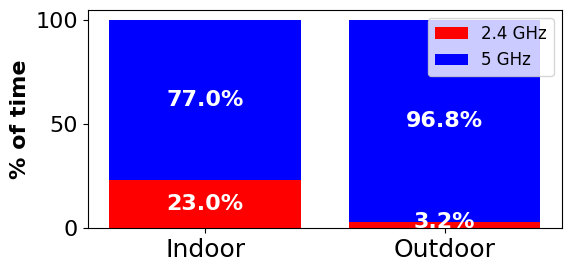

In [ ]:
sigcap_focus_1 = df_wifi_conn_time[df_wifi_conn_time["Collection"]=='Day1-WIFI-IN']
sigcap_focus_2 = df_wifi_conn_time[df_wifi_conn_time["Collection"]=='Day1-WIFI-OUT']

df_in_5 = sigcap_focus_1[
    (sigcap_focus_1["Frequency"]>=3000)]["Time"].count() / sigcap_focus_1.shape[0] * 100
df_out_5 = sigcap_focus_2[
    (sigcap_focus_2["Frequency"]>=3000)]["Time"].count() / sigcap_focus_2.shape[0] * 100

df_in_24 = sigcap_focus_1[
    (sigcap_focus_1["Frequency"]<3000)]["Time"].count() / sigcap_focus_1.shape[0] * 100
df_out_24 = sigcap_focus_2[
    (sigcap_focus_2["Frequency"]<3000)]["Time"].count() / sigcap_focus_2.shape[0] * 100

print(df_in_5, df_in_24, df_out_5, df_out_24)

fig, ax = plt.subplots(figsize=(6, 3))

ax.bar([0, 1], [df_in_24, df_out_24], label="2.4 GHz", color='red')
ax.bar([0, 1], [df_in_5, df_out_5], label="5 GHz", color='blue', bottom=[df_in_24, df_out_24])

ax.set_xlabel("", fontsize=18)
ax.set_ylabel('% of time', fontsize=16, fontweight='bold')
# Add percentage labels for both 2.4 GHz and 5 GHz bars
ax.text(0, df_in_24 / 2, f"{df_in_24:.1f}%", fontsize=16, color='white', ha='center', va='center', fontweight='bold')
ax.text(0, df_in_24 + df_in_5 / 2, f"{df_in_5:.1f}%", fontsize=16, color='white', ha='center', va='center', fontweight='bold')
# ax.text(1, df_out_24 / 2, f"{df_out_24:.1f}%", fontsize=16, color='white', ha='center', va='center', fontweight='bold')
ax.text(1, df_out_24, f"{df_out_24:.1f}%", fontsize=16, color='white', ha='center', va='center', fontweight='bold')
ax.text(1, df_out_24 + df_out_5 / 2, f"{df_out_5:.1f}%", fontsize=16, color='white', ha='center', va='center', fontweight='bold')

plt.xticks([0, 1], ["Indoor", "Outdoor"], fontsize=18)
# plt.yticks(fontsize=16, fontweight='bold')
# plt.title("Outdoors",fontsize=18)
plt.legend(fontsize=12, ncol=1)
plt.tight_layout()
# plt.savefig("figs/wifi_conn_time.pdf")
plt.show()
plt.close()

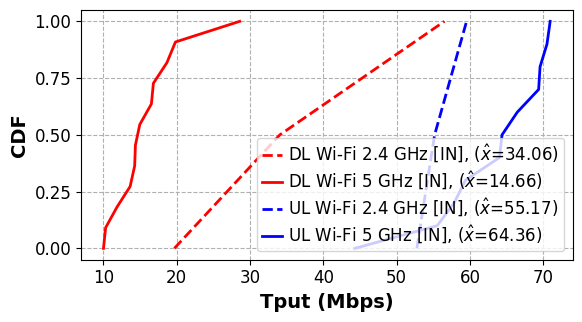

In [33]:
fig, ax = plt.subplots(figsize=(6, 3.5))
plt.rcParams['text.usetex'] = False 

df_temp = df_app_dl[(df_app_dl['qp_wifi_tech']==24) & (df_app_dl['Collection']=='Day1-WIFI-IN')]["Calculated Tput (Mbps)"].dropna().sort_values()
ax.plot(df_temp,np.linspace(0, 1, df_temp.shape[0]),
    label=rf"DL Wi-Fi 2.4 GHz [IN], ($\hat{{x}}$={df_temp.median():.2f})",
    markersize=12, linewidth=2, linestyle='--', color="r")
del df_temp

df_temp = df_app_dl[(df_app_dl['qp_wifi_tech']==5) & (df_app_dl['Collection']=='Day1-WIFI-IN')]["Calculated Tput (Mbps)"].dropna().sort_values()
ax.plot(df_temp,np.linspace(0, 1, df_temp.shape[0]),
    label=rf"DL Wi-Fi 5 GHz [IN], ($\hat{{x}}$={df_temp.median():.2f})",
    markersize=12, linewidth=2, linestyle='-', color="r")
del df_temp

df_temp = df_app_ul[(df_app_ul['qp_wifi_tech']==24) & (df_app_ul['Collection']=='Day1-WIFI-IN')]["Calculated Tput (Mbps)"].dropna().sort_values()
ax.plot(df_temp,np.linspace(0, 1, df_temp.shape[0]),
    label=rf"UL Wi-Fi 2.4 GHz [IN], ($\hat{{x}}$={df_temp.median():.2f})",
    markersize=12, linewidth=2, linestyle='--', color="b")
del df_temp

df_temp = df_app_ul[(df_app_ul['qp_wifi_tech']==5) & (df_app_ul['Collection']=='Day1-WIFI-IN')]["Calculated Tput (Mbps)"].dropna().sort_values()
ax.plot(df_temp,np.linspace(0, 1, df_temp.shape[0]),
    label=rf"UL Wi-Fi 5 GHz [IN], ($\hat{{x}}$={df_temp.median():.2f})",
    markersize=12, linewidth=2, linestyle='-', color="b")
del df_temp


ax.set_xlabel('Tput (Mbps)', fontsize=14, fontweight='bold')
ax.set_ylabel('CDF', fontsize=14, fontweight='bold')
ax.yaxis.set_minor_locator(AutoLocator())
ax.grid(True, linestyle='--', which='both', axis='both')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12, loc='lower right', handlelength=1.2, handletextpad=0.4, borderpad=0.3, labelspacing=0.3)
plt.tight_layout()
# plt.savefig('figs/wifi_rssi_cdf.pdf', bbox_inches='tight')
plt.show()

/var/folders/j_/lbf42_q147v8jdwz_w2my7_c0000gn/T/ipykernel_61030/528609980.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, ha='right')


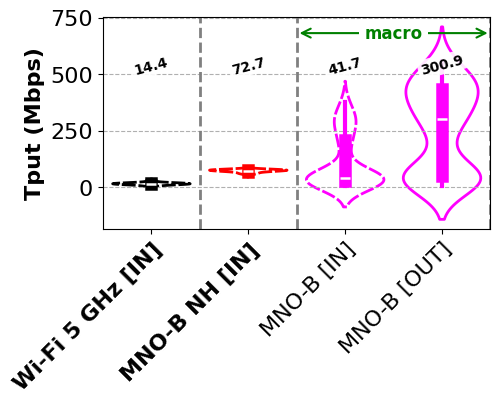

In [ ]:
df_app_dl = df_app_dl[df_app_dl['qp_wifi_tech']!=24] ### Removing 2.4GHz data

# Application IP Tput
fig, ax = plt.subplots(figsize=(5, 2.75))
# order = ['WIFI-IN', 'TMO-NH-IN', 'ATT-MNO-IN', 'TMO-MNO-IN', 'VZN-MNO-IN', 'ATT-MNO-OUT', 'TMO-MNO-OUT', 'VZN-MNO-OUT']
order = ['WIFI-IN', 'TMO-NH-IN', 'TMO-MNO-IN', 'TMO-MNO-OUT']
# palette = ['black', 'red', 'tab:blue', 'magenta', 'darkorange', 'tab:blue', 'magenta', 'darkorange']
palette = ['black', 'red', 'magenta', 'magenta']
sns.violinplot(data=df_app_dl, x='Collection_1', y='Calculated Tput (Mbps)', hue='Collection_1', fill=False, linewidth=2, order=order, hue_order=order, palette=palette, ax=ax)
# new_labels = ['Wi-Fi [IN]', 'MNO-B NH [IN]', 'MNO-A [IN]', 'MNO-B [IN]', 'MNO-C [IN]', 'MNO-A [OUT]', 'MNO-B [OUT]', 'MNO-C [OUT]']
new_labels = ['Wi-Fi 5 GHz [IN]', 'MNO-B NH [IN]', 'MNO-B [IN]', 'MNO-B [OUT]']
ax.set_xticklabels(new_labels, ha='right')

medians = df_app_dl.groupby('Collection_1')['Calculated Tput (Mbps)'].median()
for i, collection in enumerate(['WIFI-IN', 'TMO-NH-IN', 'TMO-MNO-IN', 'TMO-MNO-OUT']):
    median_value = medians[collection]
    ax.text(i, 500, f'{medians[collection]:.1f}',ha='center', color='black', fontsize=10, fontweight='bold', rotation=15,bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', boxstyle='round,pad=0.2'))

ax.annotate(
    '', xy=(1.5, 0.925), xytext=(3.5, 0.925),
    xycoords=('data', 'axes fraction'),
    textcoords=('data', 'axes fraction'),
    arrowprops=dict(arrowstyle='<->', color='green', lw=1.5),
)
ax.text(3/4, 0.925, 'macro', transform=ax.transAxes,
        ha='center', va='center', fontsize=12, fontweight='bold', color='green',
        bbox=dict(facecolor='white', alpha=1, edgecolor='none'))

ax.collections[0].set_linestyle((0,(5,1)))
ax.collections[1].set_linestyle((0,(5,1)))
ax.collections[2].set_linestyle((0,(5,1)))

plt.axvline(x=0.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(x=1.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(x=3.5, color='gray', linestyle='--', linewidth=2)
plt.xticks(rotation=45, ha='right')

dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

labels = plt.gca().get_xticklabels()
for label in labels:
    if label.get_text() in ['Wi-Fi 5 GHz [IN]', 'MNO-B NH [IN]']:
        label.set_fontweight('bold')

plt.xlabel('')
plt.ylabel('Tput (Mbps)', fontsize=16, fontweight='bold')
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1e3)}'))
# plt.title('HTTP DL Tput', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', axis='y')
# plt.yscale('log')
# plt.ylim(1e-1, 1e3)
# plt.savefig('figs/app_select_dl_tput_violin.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, order, palette

/var/folders/j_/lbf42_q147v8jdwz_w2my7_c0000gn/T/ipykernel_61030/359148296.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, ha='right')


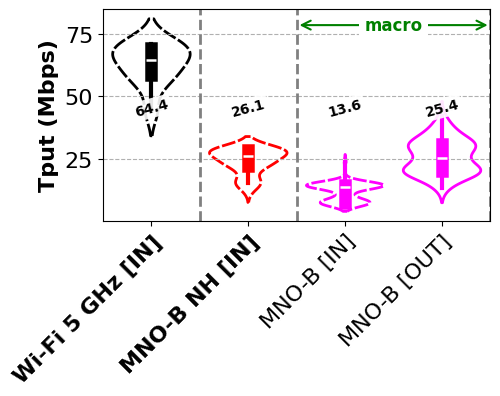

In [ ]:
df_app_ul = df_app_ul[df_app_ul['qp_wifi_tech']!=24] ### Removing 2.4GHz data

# Application IP Tput
fig, ax = plt.subplots(figsize=(5, 2.75))
# order = ['WIFI-IN', 'TMO-NH-IN', 'ATT-MNO-IN', 'TMO-MNO-IN', 'VZN-MNO-IN', 'ATT-MNO-OUT', 'TMO-MNO-OUT', 'VZN-MNO-OUT']
order = ['WIFI-IN', 'TMO-NH-IN', 'TMO-MNO-IN', 'TMO-MNO-OUT']
# palette = ['black', 'red', 'tab:blue', 'magenta', 'darkorange', 'tab:blue', 'magenta', 'darkorange']
palette = ['black', 'red', 'magenta', 'magenta']
sns.violinplot(data=df_app_ul, x='Collection_1', y='Calculated Tput (Mbps)', hue='Collection_1', fill=False, linewidth=2, order=order, hue_order=order, palette=palette, ax=ax)
# new_labels = ['Wi-Fi [IN]', 'MNO-B NH [IN]', 'MNO-A [IN]', 'MNO-B [IN]', 'MNO-C [IN]', 'MNO-A [OUT]', 'MNO-B [OUT]', 'MNO-C [OUT]']
new_labels = ['Wi-Fi 5 GHz [IN]', 'MNO-B NH [IN]', 'MNO-B [IN]', 'MNO-B [OUT]']
ax.set_xticklabels(new_labels, ha='right')

medians = df_app_ul.groupby('Collection_1')['Calculated Tput (Mbps)'].median()
for i, collection in enumerate(['WIFI-IN', 'TMO-NH-IN', 'TMO-MNO-IN', 'TMO-MNO-OUT']):
    median_value = medians[collection]
    ax.text(i, 42, f'{medians[collection]:.1f}',ha='center', color='black', fontsize=10, fontweight='bold', rotation=15,bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', boxstyle='round,pad=0.2'))

ax.annotate(
    '', xy=(1.5, 0.925), xytext=(3.5, 0.925),
    xycoords=('data', 'axes fraction'),
    textcoords=('data', 'axes fraction'),
    arrowprops=dict(arrowstyle='<->', color='green', lw=1.5),
)
ax.text(3/4, 0.925, 'macro', transform=ax.transAxes,
        ha='center', va='center', fontsize=12, fontweight='bold', color='green',
        bbox=dict(facecolor='white', alpha=1, edgecolor='none'))

ax.collections[0].set_linestyle((0,(5,1)))
ax.collections[1].set_linestyle((0,(5,1)))
ax.collections[2].set_linestyle((0,(5,1)))

plt.axvline(x=0.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(x=1.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(x=3.5, color='gray', linestyle='--', linewidth=2)
plt.xticks(rotation=45, ha='right')

dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

labels = plt.gca().get_xticklabels()
for label in labels:
    if label.get_text() in ['Wi-Fi 5 GHz [IN]', 'MNO-B NH [IN]']:
        label.set_fontweight('bold')

plt.xlabel('')
plt.ylabel('Tput (Mbps)', fontsize=16, fontweight='bold')
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1e3)}'))
# plt.title('HTTP DL Tput', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', axis='y')
# plt.yscale('log')
# plt.ylim(1e-1, 1e3)
# plt.savefig('figs/app_select_ul_tput_violin.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, order, palette